This project applies Linear Regression to model and predict a continuous target variable using real-world data from automation.csv. It demonstrates a standard end-to-end machine learning pipeline using Python and scikit-learn.

IMPORT LIBRARIES

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
data=pd.read_csv(r"C:\Users\SHAHIN\OneDrive\Desktop\ml project\automation linear2\automation.csv")
#del data['symboling'], data['normalized_losses'], data['make'],data['number_of_doors']
print(data)

     symboling  normalized_losses         make fuel_type aspiration  \
0            3                168  alfa-romero       gas        std   
1            3                168  alfa-romero       gas        std   
2            1                168  alfa-romero       gas        std   
3            2                164         audi       gas        std   
4            2                164         audi       gas        std   
..         ...                ...          ...       ...        ...   
196         -1                 95        volvo       gas        std   
197         -1                 95        volvo       gas      turbo   
198         -1                 95        volvo       gas        std   
199         -1                 95        volvo    diesel      turbo   
200         -1                 95        volvo       gas      turbo   

    number_of_doors   body_style drive_wheels engine_location  wheel_base  \
0               two  convertible          rwd           front        8

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

REMOVE SOME FEATURES TO REDUCE SIZE OF TABLE SELECT IMPORTANT ONCE

In [73]:
data=pd.read_csv(r"C:\Users\SHAHIN\OneDrive\Desktop\ml project\automation linear2\automation.csv",
usecols=['aspiration','wheel_base','engine_size','fuel_type','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','make','price'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               201 non-null    object 
 1   fuel_type          201 non-null    object 
 2   aspiration         201 non-null    object 
 3   wheel_base         201 non-null    float64
 4   engine_size        201 non-null    int64  
 5   bore               201 non-null    float64
 6   stroke             201 non-null    float64
 7   compression_ratio  201 non-null    float64
 8   horsepower         201 non-null    int64  
 9   peak_rpm           201 non-null    int64  
 10  city_mpg           201 non-null    int64  
 11  highway_mpg        201 non-null    int64  
 12  price              201 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 20.5+ KB


CHECKING NULLS IN THE DATA SET

In [74]:
data.isna().sum()

make                 0
fuel_type            0
aspiration           0
wheel_base           0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

CHECK WHEATHER ANY DUPLICATES

In [75]:
data.duplicated().sum()

0

CONVERTING CATEGORICAL DATA IN TO NUMERICAL(LebelEncoding)

In [76]:

fuel_encoder = LabelEncoder()
aspiration_encoder = LabelEncoder()
make_encoder = LabelEncoder()

data['fuel_type'] = fuel_encoder.fit_transform(data['fuel_type'])
data['aspiration'] = aspiration_encoder.fit_transform(data['aspiration'])
data['make'] = make_encoder.fit_transform(data['make'])

<Axes: >

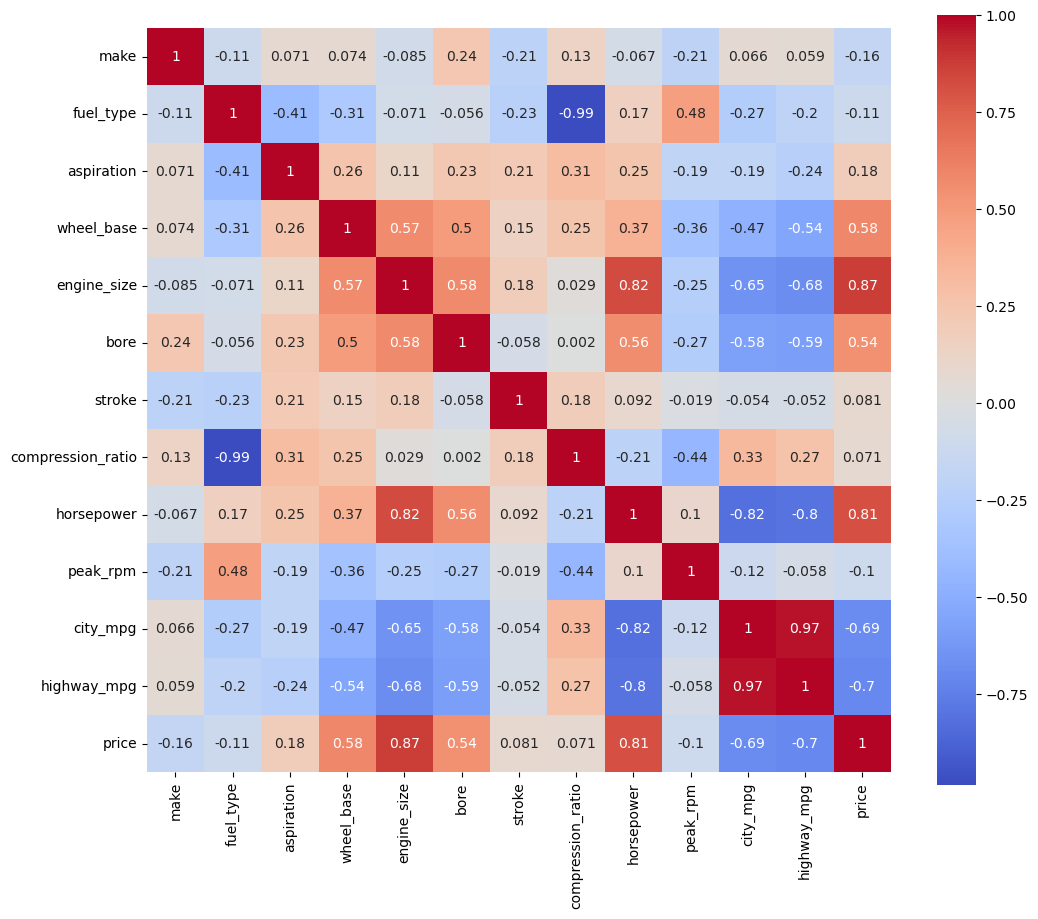

In [77]:
plt.figure(figsize=(12,10))
corr_matrix=data.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)

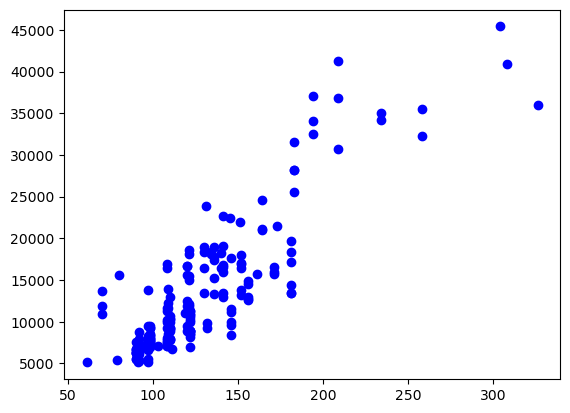

In [78]:
plt.scatter(data['engine_size'],data['price'],color='blue')
plt.show()

SPLITTING INDEPENDENT AND DEPENDENT VARIABLES.SPLITTING TRAIN AND TEST VARIABLE

In [79]:
x = data.iloc[:, 0:12].values  
x=pd.DataFrame(x)
y = data.iloc[:, 12].values
y=pd.DataFrame(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

BUILDING MODEL

In [80]:
model=LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

PREDITING VALUES

In [81]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

         0
95    8249
15   41315
30    6855
158   9258
128  11850
115   5572
69   35056
171   9988
175  15998
45   35550
66   28176
183   9495
165   9989
78    8499
187  13295
178   7775
56    8845
152   6938
82    6989
68   34184
124  34028
16   36880
148   6488
93    7499
65   28248
60   10795
84    9279
67   31600
125  37028
132  18150
9    16430
18    6295
55   15645
75    6669
150   7898
104  11900
135   7053
137   7126
164   9639
76    7689
79   12629
[[ 5266.95105947]
 [35926.55834674]
 [ 7645.37786708]
 [ 5734.14705755]
 [12809.21635431]
 [ 2571.38868026]
 [35779.14643575]
 [ 7752.84442998]
 [24945.86030139]
 [33398.90629905]
 [27524.88781755]
 [ 9126.89867782]
 [10986.21096174]
 [ 9687.82915278]
 [12358.34719723]
 [ 8644.89814009]
 [10927.36431885]
 [ 5424.72788469]
 [ 9687.82915278]
 [37093.05889192]
 [34080.59430475]
 [36403.5245297 ]
 [ 4646.08669938]
 [ 5225.45908717]
 [27753.0936652 ]
 [14898.869626  ]
 [11117.39916869]
 [28140.35207333]
 [34080.59430475]
 [18109.34122557

CHECKIN IF ANY ERRORS

In [82]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 1873.338160155789
mean squared error: 6174212.581249798
root mean squared error: 2484.7962856640374


In [83]:
score=metrics.r2_score(y_test,y_pred)
print("r2 score is:",score*100,"%")

r2 score is: 94.95351415841846 %


GIVING NEW SAMPLE INPUT TO FIND THE PRICE

In [ ]:
####GIVING NEW SAMPLE###
fueltype = fuel_encoder.transform(['gas'])[0]
aspiration = aspiration_encoder.transform(['turbo'])[0]
make = make_encoder.transform(['audi'])[0]
# Create a new DataFrame matching the model's input structure
new_sample = pd.DataFrame([[  
    aspiration,   # aspiration
    90,           # wheel_base
    160,          # engine_size
    fueltype,     # fuel_type
    5,            # bore
    7,            # stroke
    15,           # compression_ratio
    200,          # horsepower
    6000,         # peak_rpm
    24,           # city_mpg
    32,           # highway_mpg
    make          # make
]], columns=x.columns)

# Predict price of vehicle
predicted_price = model.predict(new_sample)
print("Predicted price of vehicle:", predicted_price)


Predicted price of vehicle: [[679030.46238748]]


Outcome Summary
-Built and trained a Linear Regression model using scikit-learn

-Evaluated the model on a test set using standard regression metrics

-Explored relationships between features and target using plots